# Задание
---
## Для всех:
### `n_features = 2`
### `n_redundant = 0`
### `n_informative = 1`
### `n_clusters_per_class = 1`
---
## Для варианта №11
### Вид классов: `classification`
### Random state: `15`
### Class sep: `0.6`

In [1]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    x1, x2 = np.meshgrid(xx, yy)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(x1, 
                    x2, 
                    decision_values.reshape(x1.shape), 
                    levels=fill_levels, 
                    colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(x1, 
                   x2, 
                   decision_values.reshape(x1.shape), 
                   levels=levels, 
                   colors='black')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

## Генерация выборки

In [4]:
X, y = make_classification(n_features=2,
                           n_samples=1000,
                           n_redundant=0, 
                           n_informative=1, 
                           n_clusters_per_class=1, 
                           random_state=15, 
                           class_sep=0.6)

In [5]:
print('Координаты точек: ')
print(X[:15])
print('Метки класса: ')
print(y[:15])

Координаты точек: 
[[-0.32654509 -0.48287283]
 [-0.56423228  0.36908979]
 [ 1.80734839  0.64084024]
 [-1.13815022 -0.3922336 ]
 [-0.77269253  0.98787649]
 [-0.76362783 -1.03345078]
 [ 1.27084064  1.02090267]
 [ 0.28768416  0.02922487]
 [-0.19381938 -1.04395297]
 [-0.8936574  -0.64384405]
 [ 0.30631716  0.81656104]
 [-1.64047657  0.40696626]
 [-0.49234077 -1.04988151]
 [ 1.17360256 -0.58037911]
 [-0.66270457 -0.25318302]]
Метки класса: 
[0 1 1 0 1 0 1 1 0 0 1 1 0 0 0]


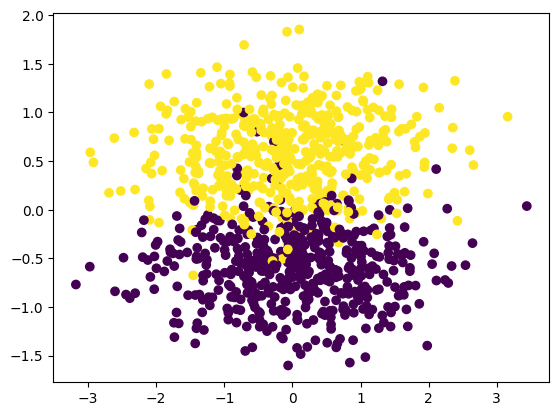

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Разбитие выборки на обучающее и тестовое множество

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.10,
                                                    random_state=42)

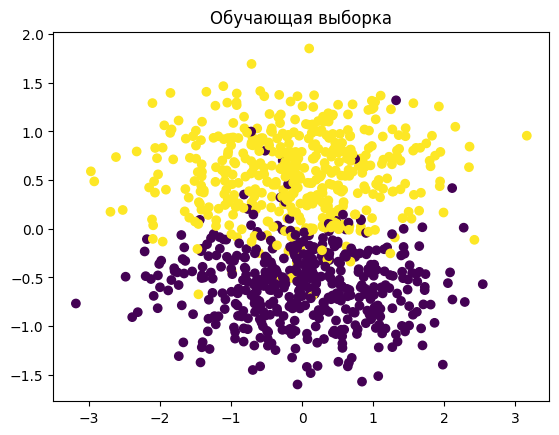

In [8]:
plt.title('Обучающая выборка')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

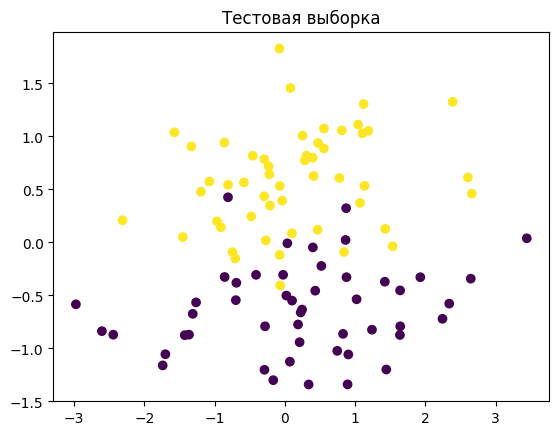

In [9]:
plt.title('Тестовая выборка')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

## Кластеризация

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def show_info(classifier, classifier_name, real_values, prediction_values):
    print(f'Метод классификации: {classifier_name}\n')

    # Выводим предсказанное и реальное значение
    print('Предсказанные и реальные значения:')
    print(prediction_values)
    print(real_values)

    # Выводим матрицу неточностей
    print('\nМатрица неточностей')
    print(confusion_matrix(real_values, prediction_values))

    # Выводим точность классификации
    print(f'\nТочность классификации: {accuracy_score(prediction_values, real_values)}')

    # Выводим полноту
    print('\nПолнота: ')
    print(classification_report(real_values, prediction_values))

    # AUC ROC
    print(f'\nПлощадь под кривой: {roc_auc_score(real_values, prediction_values)}')

    plt.xlabel('Первый класс')
    plt.ylabel('Второй класс')
    plt.title(classifier_name.upper())
    plot_2d_separator(classifier, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

### Метод k-ближайших соседей (1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Метод классификации: ближайшие соседи (1)

Предсказанные и реальные значения:
[1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[45  4]
 [ 4 47]]

Точность классификации: 0.92

Полнота: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        51

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Площадь под кривой: 0.9199679871948779


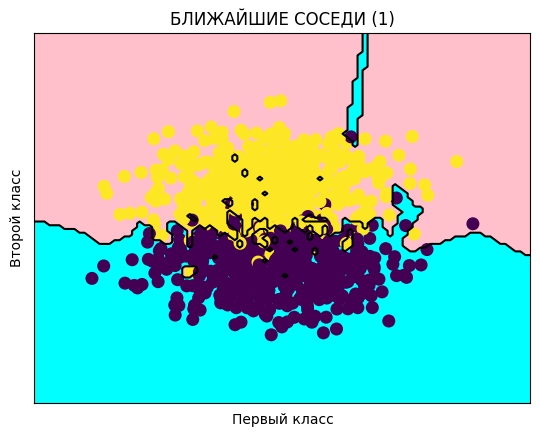

In [12]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (1)', y_test, prediction)

Метод классификации: ближайшие соседи (3)

Предсказанные и реальные значения:
[1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[44  5]
 [ 4 47]]

Точность классификации: 0.91

Полнота: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        49
           1       0.90      0.92      0.91        51

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100


Площадь под кривой: 0.9097639055622249


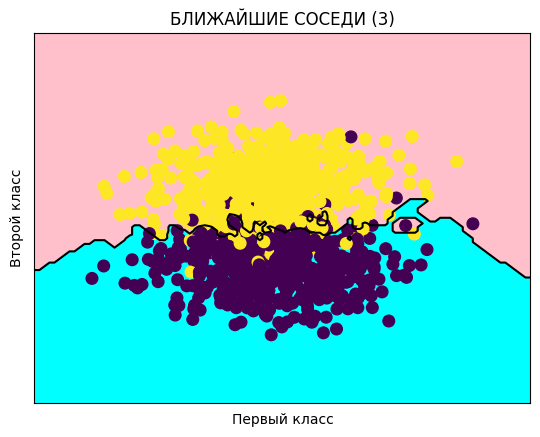

In [13]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (3)', y_test, prediction)

Метод классификации: ближайшие соседи (5)

Предсказанные и реальные значения:
[0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[44  5]
 [ 5 46]]

Точность классификации: 0.9

Полнота: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        49
           1       0.90      0.90      0.90        51

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100


Площадь под кривой: 0.8999599839935973


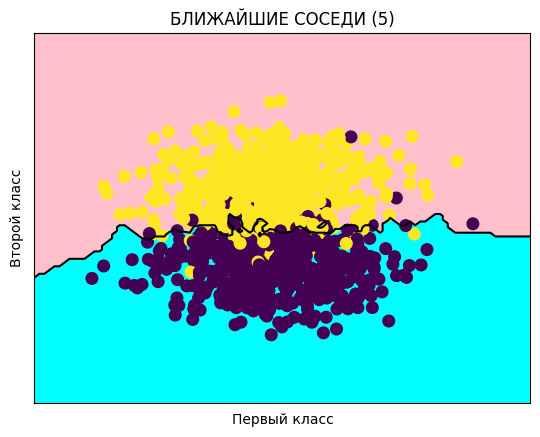

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (5)', y_test, prediction)

Метод классификации: ближайшие соседи (9)

Предсказанные и реальные значения:
[0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[45  4]
 [ 6 45]]

Точность классификации: 0.9

Полнота: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.92      0.88      0.90        51

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100


Площадь под кривой: 0.9003601440576231


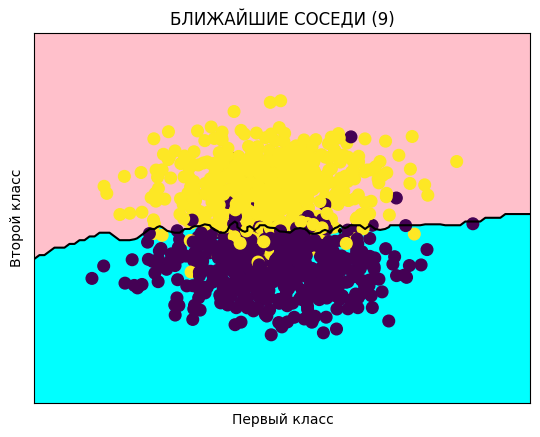

In [15]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (9)', y_test, prediction)

## Наивный байесовский классификатор

Метод классификации: Наивный байесовский классификатор

Предсказанные и реальные значения:
[0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[45  4]
 [ 6 45]]

Точность классификации: 0.9

Полнота: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.92      0.88      0.90        51

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100


Площадь под кривой: 0.9003601440576231


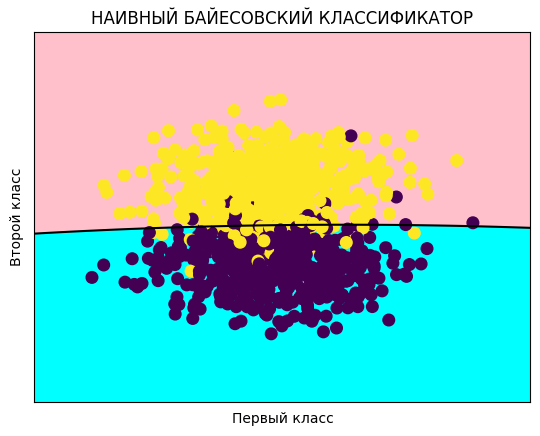

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Обучаем модель данных
nb.fit(X_train, y_train)

# Оцениваем качество модели
prediction = nb.predict(X_test)

# Выводим сводную информацию
show_info(nb, 'Наивный байесовский классификатор', y_test, prediction)

## Случайный лес

Метод классификации: случайный лес (5)

Предсказанные и реальные значения:
[0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[42  7]
 [ 5 46]]

Точность классификации: 0.88

Полнота: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        49
           1       0.87      0.90      0.88        51

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100


Площадь под кривой: 0.8795518207282913


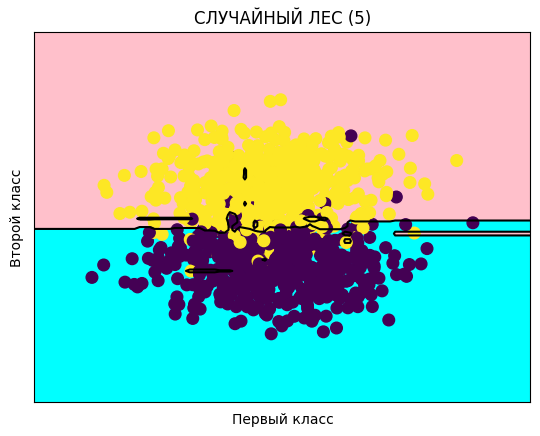

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (5)', y_test, prediction)

Метод классификации: случайный лес (10)

Предсказанные и реальные значения:
[0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[45  4]
 [ 6 45]]

Точность классификации: 0.9

Полнота: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.92      0.88      0.90        51

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100


Площадь под кривой: 0.9003601440576231


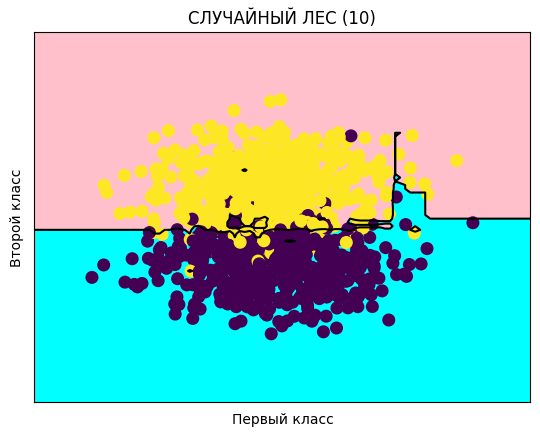

In [18]:
rfc = RandomForestClassifier(n_estimators=10)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (10)', y_test, prediction)

Метод классификации: случайный лес (15)

Предсказанные и реальные значения:
[0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[44  5]
 [ 7 44]]

Точность классификации: 0.88

Полнота: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.90      0.86      0.88        51

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100


Площадь под кривой: 0.8803521408563425


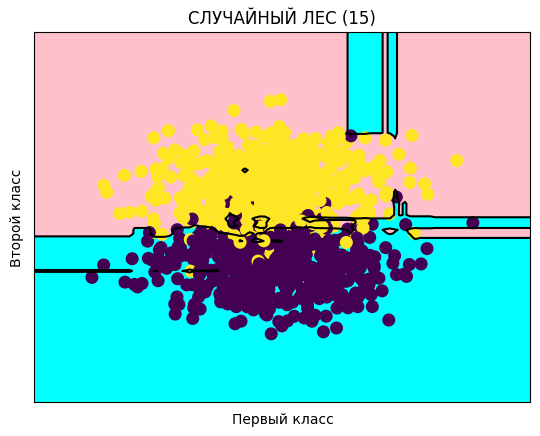

In [19]:
rfc = RandomForestClassifier(n_estimators=15)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (15)', y_test, prediction)

Метод классификации: случайный лес (20)

Предсказанные и реальные значения:
[0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[46  3]
 [ 6 45]]

Точность классификации: 0.91

Полнота: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.94      0.88      0.91        51

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100


Площадь под кривой: 0.9105642256902761


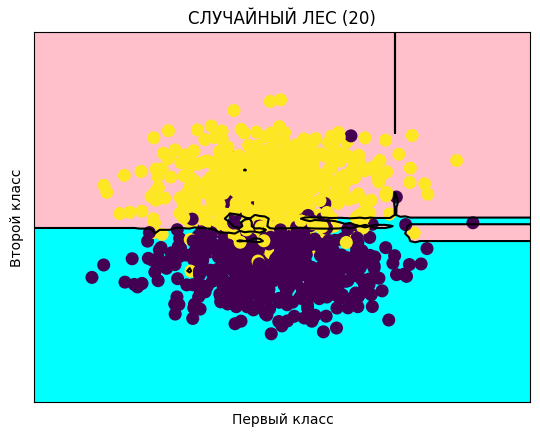

In [20]:
rfc = RandomForestClassifier(n_estimators=20)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (20)', y_test, prediction)

Метод классификации: случайный лес (50)

Предсказанные и реальные значения:
[0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1]
[1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1]

Матрица неточностей
[[45  4]
 [ 5 46]]

Точность классификации: 0.91

Полнота: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        51

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100


Площадь под кривой: 0.9101640656262505


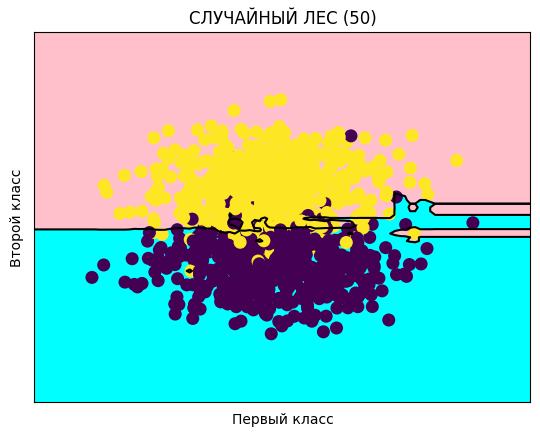

In [21]:
rfc = RandomForestClassifier(n_estimators=50)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (50)', y_test, prediction)